# NetTech Telecom Customer Data Analysis, 2019

##### This project aims at getting insights from the analysis of the customer data and using these to find out the reason why the company is losing customers to competitors  

#### Project Break down



 Task 1: Data Manipulation 
     # a. Customer gender analysis(Male and Female)
     # b. Customer citizen status analysis(Junior or Senior)
     # c. Customer payment method analysis
     # d. Customer contract type analysis
 Task 2: Data Visualization
     # a.InternetService mostly used by customers(Bar chart) and observation
     # b.Tenure of customers(Histogram) and observation 
     # c.Tenure against Monthly charges(Scatter plot) and obervation
     # d.Contract against Tenure (Box-plot) and observation
 Task 3: Maching Learning 
     # a.Building a linear regression model (Monthly charges against tenure)
     # b.Logistic Regression model(i.Churn against Monthly charges ii.Churn against Monthly charges and tenure)
     # c.Decision Tree model (Churn against Tenure)
 Conclusion

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt

In [2]:
#read data from file
customer_churn = pd.read_csv('customer_churn.csv')

In [111]:
#check the size of data
customer_churn.shape

(7043, 21)

In [56]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
customer_churn.shape

(7043, 21)

In [59]:
#get the keys of male and female customers
male_female_variable = customer_churn['gender'].value_counts().keys().to_list()
male_female_variable

['Male', 'Female']

In [60]:
#get the number of male and female
count_of_customers = customer_churn['gender'].value_counts()
count_of_customers

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0.5, 1.0, 'A graph to show male and female customers in the company')

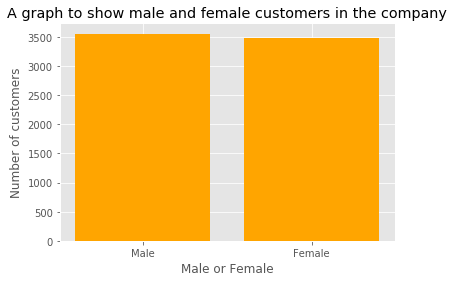

In [49]:
#plot the number of male and female customers using the bar plot
plt.bar(male_female_variable,count_of_customers, color='orange')
plt.style.use('ggplot')
plt.xlabel('Male or Female')
plt.ylabel('Number of customers')
plt.title('A graph to show male and female customers in the company')

In [61]:
#the number of males that are senior citizens
senior_male_citizens = customer_churn[(customer_churn['gender'] == 'Male') & (customer_churn['SeniorCitizen'] == 1)]

In [166]:
#get their size
senior_male_citizens.shape

(574, 21)

In [62]:
#the number of males that are not senior citizens
junior_male_citizens = customer_churn[(customer_churn['gender'] == 'Male') & (customer_churn['SeniorCitizen'] == 0)]

In [6]:
junior_male_citizens.shape

(2981, 21)

In [98]:
#the number of females that are senior citizens
senior_female_citizens = customer_churn[(customer_churn['gender'] == 'Female') & (customer_churn['SeniorCitizen'] == 1)]

In [99]:
senior_female_citizens.shape

(568, 21)

In [64]:
#the number of females that are junior citizens
junior_female_citizens = customer_churn[(customer_churn['gender'] == 'Female') & (customer_churn['SeniorCitizen'] == 0)]

In [12]:
junior_female_citizens.shape

(2920, 21)

In [106]:
#get the total number of senior customers(bothe male and female in the company)
senior_customers = customer_churn[(customer_churn['SeniorCitizen'] == 1)]
senior_customers.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No


In [52]:
senior_customers.shape

(1142, 21)

In [107]:
#get the total number of junior customers(bothe male and female in the company)
junior_customers = customer_churn[(customer_churn['SeniorCitizen'] == 0)]
junior_customers.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [18]:
junior_customers.shape

(6475, 21)

Observation one
1. Junior customers are more than senior customers
2. Junior male customers are more than senior ones
3. Junior female customers are more than senior ones

In [108]:
#visualizing
junior_male_customers = junior_male_citizens['SeniorCitizen'].value_counts()
senior_male_customers = senior_male_citizens['SeniorCitizen'].value_counts()
junior_female_customers = junior_female_citizens['SeniorCitizen'].value_counts()
senior_female_customers = senior_female_citizens['SeniorCitizen'].value_counts()
senior_customers = senior_customers['SeniorCitizen'].value_counts()
junior_customers = junior_customers['SeniorCitizen'].value_counts()

In [82]:
#show the first observation into graphically
#get the values for the different axes

x_values = ['JS','SC','JMC','SMC','JFC','SFC']
x_indexes = np.arange(len(x_values)) #length of x_values
junior_male_citizens['SeniorCitizen'].value_counts()

0    2981
Name: SeniorCitizen, dtype: int64

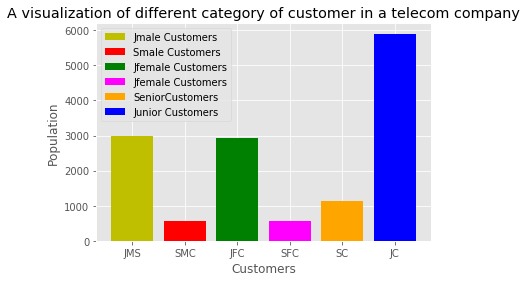

In [110]:
#plotting the graph

#width = 0.3
plt.bar('JMS', junior_male_customers, color='y', label='Jmale Customers')
plt.bar('SMC' , senior_male_customers,color='red', label='Smale Customers')
plt.bar('JFC', junior_female_customers,color='green',label='Jfemale Customers')
plt.bar('SFC', senior_female_customers,color='magenta',label='Jfemale Customers')
plt.bar('SC', senior_customers, color='orange',label='SeniorCustomers')
plt.bar('JC', junior_customers,color='b', label='Junior Customers')
plt.xlabel('Customers')
plt.ylabel('Population')
plt.title('A visualization of different category of customer in a telecom company')
plt.legend()

In [18]:
#get the dependentd column with all rows
dependents_col = customer_churn.iloc[:,4]

In [19]:
dependents_col.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [132]:
#get the customerswith the option of streaming videos column with all rows
customer_15 = customer_churn.iloc[:,14]

In [133]:
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [93]:
#Male customers that are senior citizen and use electronic check payment method
SeniorMaleElectronic = customer_churn[(customer_churn['SeniorCitizen'] == 1) & (customer_churn['gender'] == 'Male') & (customer_churn['PaymentMethod'] == 'Electronic check')]

In [29]:
SeniorMaleElectronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [39]:
SeniorMaleElectronic.shape

(298, 21)

In [30]:
#Extract all customers whose tenure is greater than 70 months or their monthly charges is more than 100
CustomerTotalTenure = customer_churn[(customer_churn['tenure']>70) | (customer_churn['MonthlyCharges']>100)]

In [37]:
CustomerTotalTenure.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [38]:
CustomerTotalTenure.shape

(1259, 21)

In [43]:
#Extract all customers whose contract is of two years,payment method is mailed check and value of churn is yes

TwoMailYes = customer_churn[(customer_churn['Contract']=='Two year') & (customer_churn['PaymentMethod']=='Mailed check') & (customer_churn['Churn']=='Yes')]

In [44]:
TwoMailYes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [46]:
#Find a random sample of 333 customers
customer_333 = customer_churn.sample(333)

In [50]:
head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2698,8150-QUDFX,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,51.6,No
2455,8481-YYXWG,Female,0,No,No,5,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,89.35,461.7,Yes
6988,1684-FLBGS,Female,0,Yes,Yes,23,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1652.1,No
2477,1212-GLHMD,Male,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,86.05,244.85,No
4824,3339-EAQNV,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),97.25,7133.1,No


In [51]:
customer_333.shape

(333, 21)

In [54]:
#count the number of churn in each category tht is ether yes or no
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
#category of customers based on their contract type
customer_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

### Task 2: Data Visualization

In [67]:
customer_churn['InternetService'].value_counts().keys().to_list()

['Fiber optic', 'DSL', 'No']

In [71]:
customer_churn['InternetService'].value_counts().to_list()

[3096, 2421, 1526]

In [105]:
np_xaxis = np.arange(len(customer_churn['TotalCharges']))

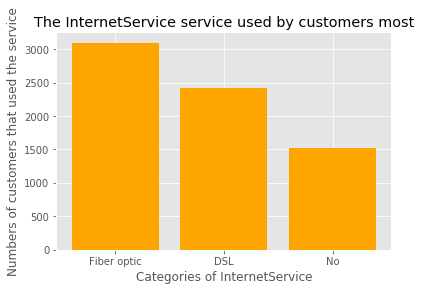

In [96]:
x = customer_churn['InternetService'].value_counts().keys().to_list()
y = customer_churn['InternetService'].value_counts().to_list()
plt.title('The InternetService service used by customers most')
plt.xlabel('Categories of InternetService')
plt.ylabel('Numbers of customers that used the service')

plt.bar(x, y, color='orange')
plt.style.use('ggplot')

np_xaxis = np.arange(len(customer_churn['TotalCharges']))
#plt.plot(customer_churn['InternetService'], np_xaxis)
#plt.legend()

##### Observations
    1. Fiber optics was used mostly by customers. More Fibre optic services should be produced and advertisement should be done        to promote the usage of DSL
    2. More than 1500 customers used no internet services

In [113]:
InterServiceDSL_PartnerYes = customer_churn[(customer_churn['InternetService']=='DSL') & (customer_churn['Partner']=='Yes')]

In [114]:
InterServiceDSL_PartnerYes.shape

(1168, 21)

In [126]:
InterServiceDSL_PartnerNo = customer_churn[(customer_churn['InternetService']=='DSL') & (customer_churn['Partner']=='No')]

In [128]:
InterServiceDSL_PartnerNo.shape

(1253, 21)

###### Histogram to observe the rate of churning out

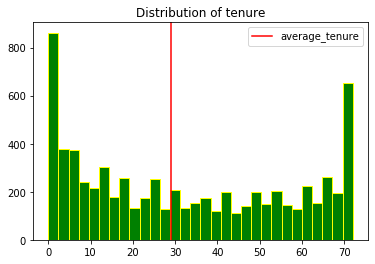

In [104]:
#plot for histogram

plt.hist(customer_churn['tenure'], bins=30, color='green',edgecolor ='yellow')
plt.title('Distribution of tenure')
plt.axvline(x=tenure_median,label='average_tenure',color='r')
plt.legend()
tenure_median = customer_churn['tenure'].median()

###### Observations
    1. Customers started churning out from the company even before the end of the first month of their tenure
    2. Average tenure of customers is around 30 days

In [89]:
#getting the median age
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [90]:
customer_churn.median()

SeniorCitizen      0.00
tenure            29.00
MonthlyCharges    70.35
dtype: float64

###### Using scatter plot to check the relationship between 'tenure' and 'monthly charges'

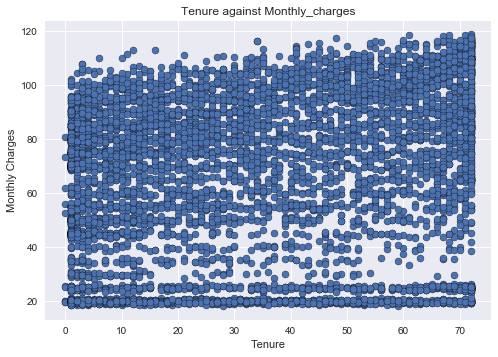

In [111]:
#scatter plot
monthly_charges = customer_churn['MonthlyCharges']
tenure = customer_churn['tenure']
#level = customer_churn[['SeniorCitizen']]

plt.scatter(tenure,monthly_charges,edgecolor='black')
#cbar = plt.colorbar()
#cbar.set_label('Scale of customers that churned or stayed')

plt.title('Tenure against Monthly_charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')

plt.style.use('seaborn')

#plt.xscale('log')
#plt.yscale('log')

##### Observation
    1. At the lowest monthly charges(20-25),as the customers started with the company, the customers tenure increases with the        the charges as there was a strong correlation between the two variables.
    2. Along the line,as the tenure of the customers increased towards the the average, there was a fair corellation with the          way the customers were charged monthly.
    3. At the higher level of customer tenure, the number of tenure increased with the monthly charges of customers 

##### Box-plot to check the relationship between tenure and contract

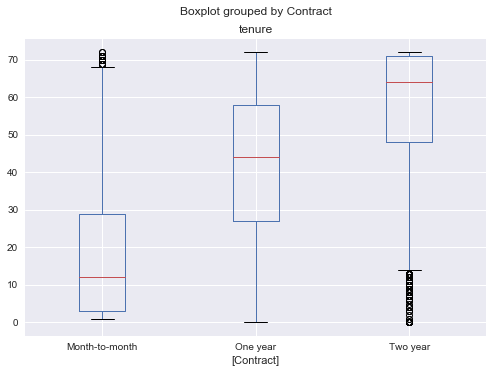

In [117]:
#boxx-plot
customer_churn.boxplot(column=['tenure'], by=['Contract'])

##### observation
    1. For the two-year contract, the median tenure of customers was fairly above 60
    2. For one-year contract, customers' median tenure was fairly above 40
    3. For month-to-month contract, customers' median tenure was fairly above 10

### Task 3: Maching Learning

In [13]:
#recall the monthly charges and tenure columns
mthlyCharges_tenure = customer_churn[['tenure', 'MonthlyCharges']]

In [14]:
mthlyCharges_tenure.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [27]:
mthlyCharges_tenure.shape

(7043, 2)

In [37]:
mthlyCharges_tenure_grouping = mthlyCharges_tenure.groupby('tenure').sum().reset_index()
mthlyCharges_tenure_grouping.head()

,tenure,MonthlyCharges
0,0,455.60
1,1,30947.80
2,2,13615.10
3,3,11603.00
4,4,10108.15


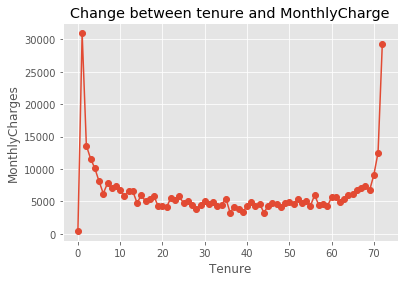

In [41]:
#visualize the change between tenure and MonthlyCharge
y_monthlyCharges = np.arange(monthlyCharges)
plt.plot(mthlyCharges_tenure_grouping['tenure'],mthlyCharges_tenure_grouping['MonthlyCharges'],'o-')

plt.style.use('ggplot')
#plt.xticks(mthlyCharges_tenure_grouping['tenure'])
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')
plt.title('Change between tenure and MonthlyCharge')

plt.show()



##### Linear regression model of monthly charges(dependent) variables against Tenure(independent)

In [11]:
#import the libraries

from sklearn.model_selection import train_test_split

In [46]:
x = customer_churn[['tenure']]
y = customer_churn[['MonthlyCharges']]
#x.head(),y.head()

In [48]:
#divide the dataset into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=0)
x_train.shape,y_train.shape,x_test.shape,x_test.shape

((4930, 1), (4930, 1), (2113, 1), (2113, 1))

In [52]:
#training the algorithm
from sklearn.linear_model import LinearRegression

#instantiate the linearRegression function
linReg = LinearRegression()

#find the best fit line
linReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
#retrieve the intercept and coefficient(slope)
print('MonthlyCharges intercept is: ',linReg.intercept_)
print('Coefficent or slope is: ',linReg.coef_)

MonthlyCharges intercept is:  [55.37598517]
Coefficent or slope is:  [[0.29341636]]


#### It is observed here that for every unit change in tenure of customers there is about 29% change in their monthly charges and since the coefficient is positive it means that tenure of customers increases with the monthly charges from the first observed monthly charges(intercept)

In [65]:
#make predictions on the test data
y_pred = linReg.predict(x_test)
#list(y_pred)[:10]

In [85]:
#compare actual  test values with the predicted values
actual_predict = pd.DataFrame(list(zip(y_test['MonthlyCharges'],y_pred)), columns=['Actual','Prediction'])
actual_predict.head()

,Actual,Prediction
0,58.20,[60.95089608310739]
1,116.60,[72.98096699067992]
2,71.95,[59.1903979015114]
3,20.45,[55.66940153831944]
4,77.75,[71.51388517268327]


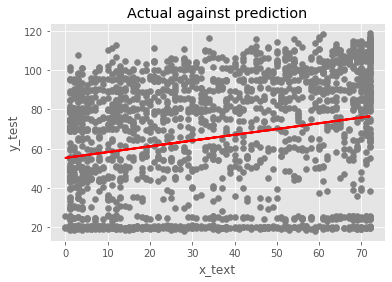

In [95]:
#Observerving our actual value againt predicted value
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)

plt.xlabel('x_text')
plt.ylabel('y_test')
plt.title('Actual against prediction')
plt.show()

In [90]:
#to see how accurate the model is,test with root mean square
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred))


29.394584027273893

#### It is observed that the monthly charges fairly depend on the tenure of customers and the straight line shows that the algorithm is correct

#### Testing with Logistic Regression 
###### a. Churn(dependent) against Monthly Charges(Independent)

In [64]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [5]:
#get the columns churn and MonthlyCharges and save as y1 and x1 respectively
x1 = customer_churn[['MonthlyCharges']]
y1 = customer_churn[['Churn']]


In [7]:
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.35, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4577, 1), (4577, 1), (2466, 1), (2466, 1))

In [10]:
#create an instance of LogisticRegression
log_model = LogisticRegression()

In [11]:
#train the model
log_model.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#predict the values of y
y_pred = log_model.predict(X_test)
#y_pred[:30]


In [39]:
#the comparison of the actual test y values with the predicted values
actual_predicted_df = pd.DataFrame(list(zip(y_test['Churn'],y_pred)), columns=['Actual y', 'Predicted y'])
actual_predicted_df.head(10)

,Actual y,Predicted y
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
5,Yes,No
6,No,No
7,Yes,No
8,No,No
9,No,No


In [41]:
#check the accuray of the train and test data
log_model.score(X_train, y_train),log_model.score(X_test, y_test)

(0.7338868254315054, 0.7360097323600974)

##### The accuracy of tested value is fairly higher than the trained value. This is good since the tested data is not biased.

In [45]:
#use confidence level to get the accuracy of the actual and the predicted
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred), accuracy_score(y_test,y_pred)

(array([[1815,    0],
        [ 651,    0]], dtype=int64), 0.7360097323600974)

In [46]:
(1815)/(1815+651)

0.7360097323600974

##### b. 'Churn'(dependent) against 'tenure' and 'MonthlyCharges'(independent)

In [47]:
#get the columns and store them in variables
x = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn[['Churn']]

In [49]:
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5634, 2), (5634, 1), (1409, 2), (1409, 1))

In [50]:
#make an instance of LogisticRegression
model = LogisticRegression()

In [51]:
#train the model
model.fit(X_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
#predict the dependable values
y_pred = model.predict(X_test)
y_pred[:10]

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No'],
      dtype=object)

In [54]:
#compare the actual test value with the predicted value
actual_predicted_df = pd.DataFrame(list(zip(y_test['Churn'],y_pred)), columns=['Actual y', 'Predicted y'])
actual_predicted_df.head(10)

,Actual y,Predicted y
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
5,Yes,Yes
6,No,No
7,Yes,Yes
8,No,No
9,No,No


In [55]:
#evaluate the model by checking the accuracy
model.score(X_train,y_train),model.score(X_test,y_test)

(0.7855875044373447, 0.7750177430801988)

#### #The accuracy of the model increased when two independent variables are considered. This shows that 'Monthly Charges' and 'Tenure' are possible causes of customers churning out to competitors

In [57]:
#furtermore, checking with confusion_matrix and accuracy_score
confusion_matrix(y_test,y_pred), accuracy_score(y_test,y_pred)

(array([[935, 106],
        [211, 157]], dtype=int64), 0.7750177430801988)

In [59]:
(935)/(935 + 211)

0.8158813263525305

In [62]:
model.predict_proba(X_test)[:7]

array([[0.71350058, 0.28649942],
       [0.78645788, 0.21354212],
       [0.53021794, 0.46978206],
       [0.75758102, 0.24241898],
       [0.90893719, 0.09106281],
       [0.33065886, 0.66934114],
       [0.74816225, 0.25183775]])

In [68]:
print('Report for model: ')
print(classification_report(y_test,y_pred))

Report for model: 
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1041
         Yes       0.60      0.43      0.50       368

    accuracy                           0.78      1409
   macro avg       0.71      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



### Testing with Decision Tree Model
###### 'Churn' (dependent) against 'tenure'(Independent)

In [70]:
#get the columns churn and tenure and save as y2 and x2 respectively
x2 = customer_churn[['tenure']]
y2 = customer_churn[['Churn']]


In [71]:
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.20, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5634, 1), (5634, 1), (1409, 1), (1409, 1))

In [76]:
#import the Decision Tree Class
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [77]:
#instantiate
#we instantiatedthe DecisionTreeClassifier s the churn data s based on category('yes' or 'no')
tree_model = DecisionTreeClassifier()

In [78]:
#train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
#predict the dependent values
y_pred = tree_model.predict(X_test)

In [80]:
#compare the actual test value with the predicted values
actual_predicted_df = pd.DataFrame(list(zip(y_test['Churn'],y_pred)), columns=['Actual y', 'Predicted y'])
actual_predicted_df.head(10)

,Actual y,Predicted y
0,No,No
1,No,No
2,No,No
3,No,Yes
4,No,No
5,Yes,No
6,No,No
7,Yes,Yes
8,No,No
9,No,No


In [83]:
#check the accuracy of the model
tree_model.score(X_train,y_train), tree_model.score(X_test,y_test)

(0.7591409300674477, 0.7466288147622427)

In [91]:
print('Report for model: ')
print(classification_report(y_test,y_pred))

Report for model: 
              precision    recall  f1-score   support

          No       0.77      0.93      0.84      1041
         Yes       0.53      0.24      0.33       368

    accuracy                           0.75      1409
   macro avg       0.65      0.58      0.59      1409
weighted avg       0.71      0.75      0.71      1409



In [92]:
#check the confusion_matrix
confusion_matrix(y_test,y_pred), accuracy_score(y_test,y_pred)

(array([[965,  76],
        [281,  87]], dtype=int64), 0.7466288147622427)

### Conclusion
###### From the above analysis and predictions, we can say that 'Monthly charges' increases more when the tenure increases which also causes customers to churn out from the company to competitors.  